# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

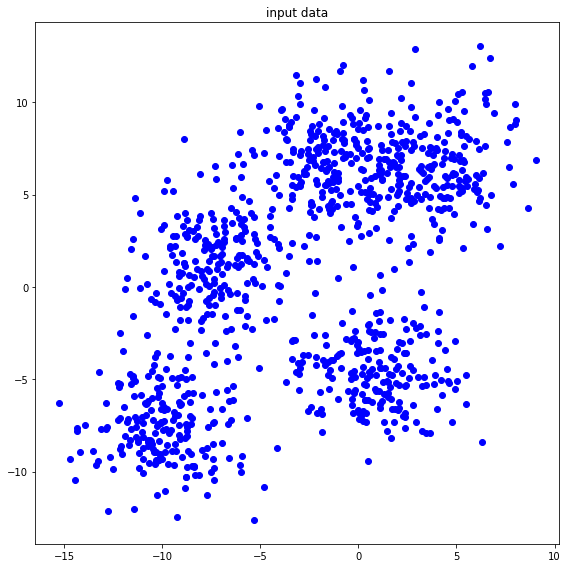

In [3]:

plt.figure(figsize=(8,8))
plt.title('input data')

plt.plot(x, y,'o', color='blue')


plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [48]:
def compute_distance(feature, center):
    distance = []
    for i in range(number_data):
        distance_x = (feature[i][0] - center[0]) ** 2
        distance_y = (feature[i][1] - center[1]) ** 2
        distance.append(np.sqrt(distance_x + distance_y))
    distance = np.array(distance)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [16]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

array([0., 1., 2., 2., 4., 1., 1., 4., 2., 3., 1., 2., 3., 1., 3., 1., 2.,
       2., 1., 3., 3., 4., 2., 2., 0., 1., 1., 3., 0., 3., 4., 1., 1., 2.,
       1., 1., 0., 2., 3., 0., 2., 2., 4., 1., 2., 3., 1., 0., 4., 0., 1.,
       4., 0., 0., 4., 4., 0., 3., 0., 3., 0., 2., 3., 0., 3., 3., 3., 2.,
       1., 1., 2., 1., 3., 3., 4., 4., 0., 2., 1., 4., 1., 2., 2., 1., 2.,
       4., 3., 3., 0., 0., 0., 0., 0., 3., 2., 1., 0., 3., 2., 3., 2., 0.,
       1., 2., 0., 2., 0., 2., 1., 4., 0., 4., 3., 0., 3., 2., 4., 3., 1.,
       0., 0., 3., 3., 0., 3., 4., 0., 0., 3., 4., 3., 0., 0., 0., 4., 2.,
       0., 1., 2., 2., 2., 1., 0., 4., 1., 3., 3., 3., 4., 1., 2., 1., 3.,
       1., 3., 4., 2., 3., 1., 4., 4., 3., 1., 1., 3., 3., 0., 4., 2., 1.,
       1., 4., 4., 3., 1., 1., 3., 3., 0., 3., 0., 1., 0., 3., 3., 1., 3.,
       1., 4., 1., 4., 2., 2., 1., 4., 3., 3., 1., 3., 0., 2., 3., 0., 3.,
       3., 4., 2., 1., 3., 2., 2., 0., 0., 4., 0., 0., 3., 2., 2., 0., 2.,
       3., 4., 0., 3., 1.

In [17]:
num_check = 0
index_storage = []
for i in range(number_data):
    if label_feature[i] == 3:
        num_check += 1
        index_storage.append(i)

cluster_feature = np.zeros(shape=(num_check, number_feature))
for i in range(num_check):
    cluster_feature[i][0] = feature[index_storage[i]][0]
    cluster_feature[i][1] = feature[index_storage[i]][1]


cent = np.mean(cluster_feature, axis = 0)

In [18]:
def compute_centroid(feature, label_feature, value_label):
    num_check = 0
    index_storage = []
    centroid = np.zeros((2,))
    for i in range(number_data):
        if label_feature[i] == value_label:
            num_check += 1
            index_storage.append(i)
            
    cluster_feature = np.zeros(shape=(num_check, number_feature))
    for i in range(num_check):
        cluster_feature[i][0] = feature[index_storage[i]][0]
        cluster_feature[i][1] = feature[index_storage[i]][1]
        
    if num_check == 0:
        centroid[0] = 999999
        centroid[1] = 999999
    else:
        centroid = np.mean(cluster_feature, axis = 0)
        
    return centroid

In [325]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [36]:
def compute_label(distance):
    index_label_feature = np.zeros(number_data)

    for i in range(number_data):
        cluster = np.argmin(distance[i])
        index_label_feature[i] = cluster
    
    return index_label_feature


In [147]:
label_feature = np.zeros(number_data)         #cluster label intialize

for i in range(len(label_feature)):
    label_feature[i] = np.random.randint(0,5) # cluster 0 ~ 4

In [148]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 10
# ===================================================

In [149]:
distance            = np.zeros(shape=(number_data, number_cluster))
distance.shape

(1000, 5)

In [150]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for i in range(number_iteration):
    distance = distance.T
    for k in range(5):
        a = compute_centroid(feature, label_feature, k)
        if a[0] > 99999:
            continue
        centroid[k] = a
        
    for j in range(5):
        distance[j] = compute_distance(feature, centroid[j])
        
    distance = distance.T
    label_feature = compute_label(distance)
    centroid_iteration[i] = centroid
    

In [57]:
centroid_iteration[1][0]

array([-8.05995912, -5.20155705])

## plot the results

In [151]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(x, y,'o', color='blue')

    plt.tight_layout()
    plt.show()

In [152]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
    #
    #
    # ===================================================
    plt.tight_layout()
    plt.show()

In [153]:
centroid_iteration[0][0]

array([-3.20649052,  0.44861616])

In [154]:
centroid_iteration

array([[[-3.20649052,  0.44861616],
        [-2.80941534,  0.65570199],
        [-2.36042926,  0.85846212],
        [-3.05980685,  0.39435524],
        [-2.73027805,  0.21644372]],

       [[-8.81197763, -2.86695604],
        [-4.84143318,  4.91599495],
        [ 1.32095436,  6.21649188],
        [-3.05980685,  0.39435524],
        [ 0.05450254, -5.28475534]],

       [[-9.53442764, -5.31029193],
        [-5.36882856,  5.05019975],
        [ 2.27529986,  6.71155219],
        [-3.89143339,  0.5367435 ],
        [ 0.88500232, -4.89139537]],

       [[-9.80709078, -6.63922147],
        [-5.27538477,  5.14029529],
        [ 2.4617755 ,  6.72812031],
        [-5.77291689,  0.46695892],
        [ 0.96825567, -4.70961846]],

       [[-9.90771607, -7.47816191],
        [-4.17648042,  5.95174268],
        [ 2.57942796,  6.70240212],
        [-7.13811023,  0.55749605],
        [ 0.98300432, -4.62017465]],

       [[-9.93224861, -7.61916831],
        [-3.05035899,  6.39318393],
        [ 2.952404

In [155]:
centroid_iteration[:,0][0]

array([-3.20649052,  0.44861616])

In [156]:
centroid0_iteration

NameError: name 'centroid0_iteration' is not defined

In [157]:

def plot_centroid(centroid_iteration, number_cluster):



    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    

    plt.plot(centroid_iteration[:, 0], '-', color='red', label= 'cluster = 0')
    plt.plot(centroid_iteration[:, 1], '-', color='green', label= 'cluster = 0')
    plt.plot(centroid_iteration[:, 2], '-', color='blue', label= 'cluster = 0')
    plt.plot(centroid_iteration[:, 3], '-', color='yellow', label= 'cluster = 0')
    plt.plot(centroid_iteration[:, 4], '-', color='orange', label= 'cluster = 0')

    
    plt.legend(loc="center right")
    plt.tight_layout()
    plt.show()

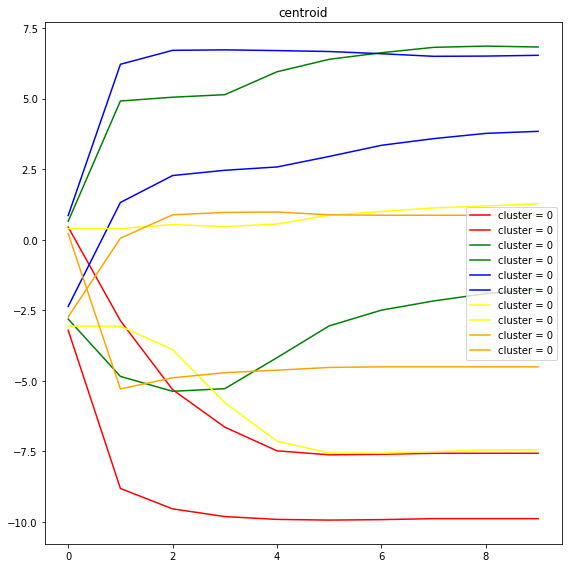

In [158]:
plot_centroid(centroid_iteration, 5)

In [190]:
def plot_cluster(feature, label_feature):
    color_num = 5
    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.scatter(x,y, c = label_feature, cmap = plt.cm.get_cmap('rainbow', color_num), alpha = 0.5)
    plt.colorbar(ticks = range(color_num), format = '%d', label = 'cluster')
    
    plt.tight_layout()
    plt.show()


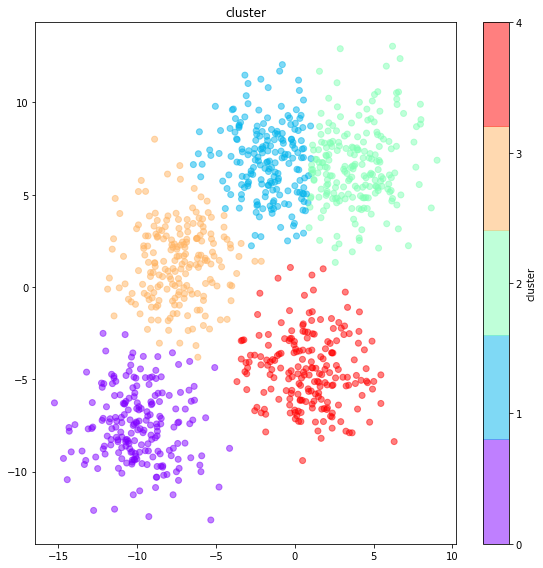

In [191]:
plot_cluster(feature, label_feature)

***

# results

***

1. plot the input data

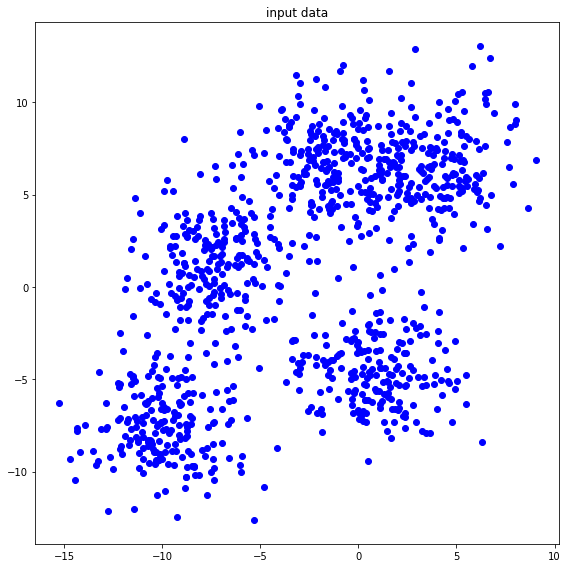

In [63]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

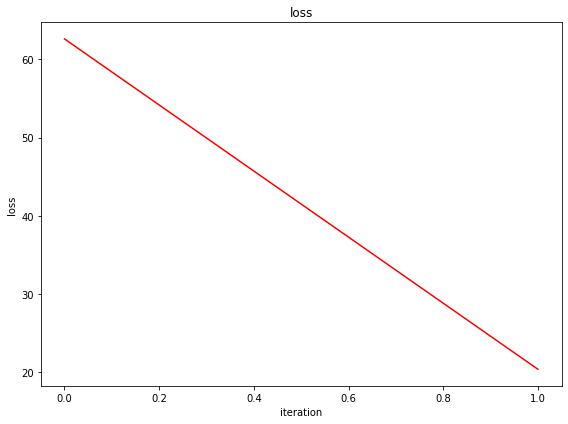

In [88]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

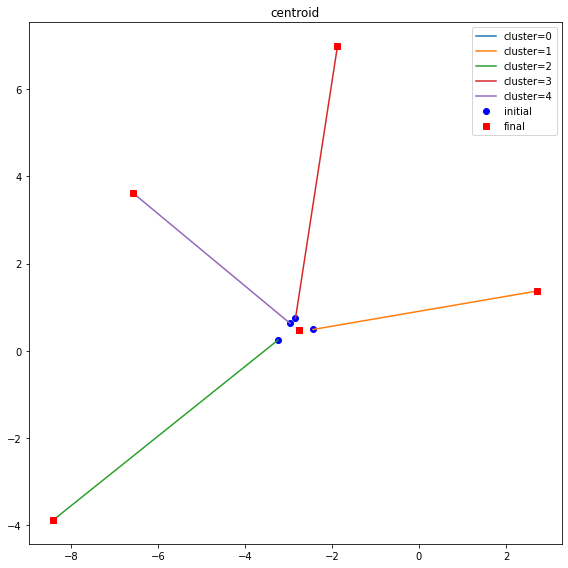

In [89]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

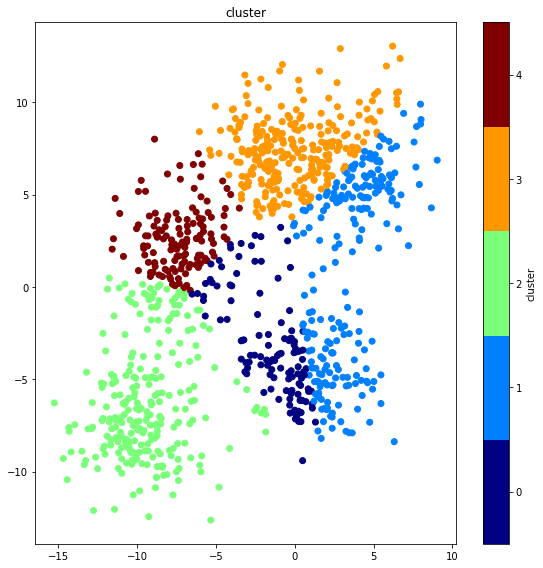

In [90]:
plot_cluster(feature, label_feature, label_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

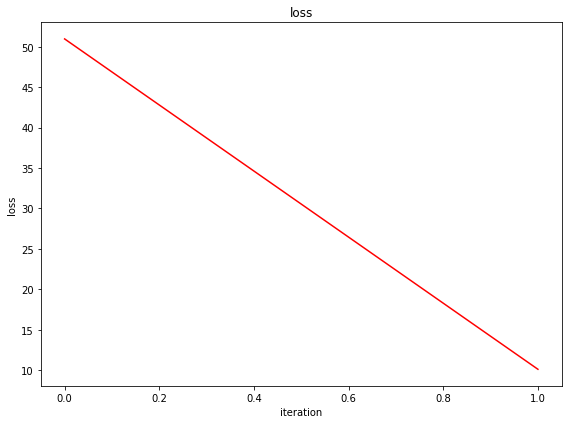

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

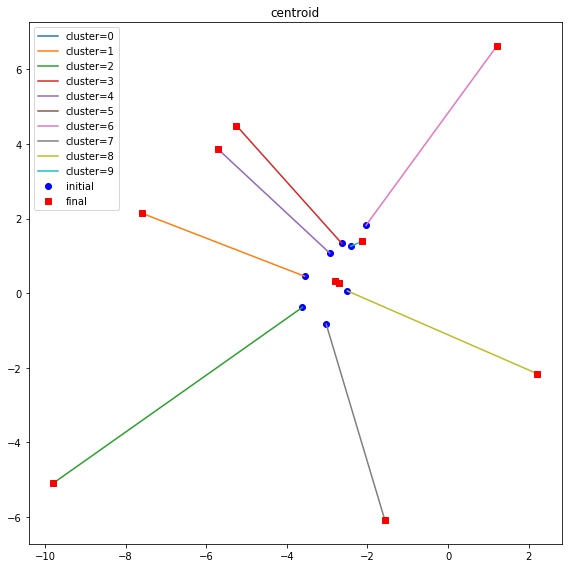

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

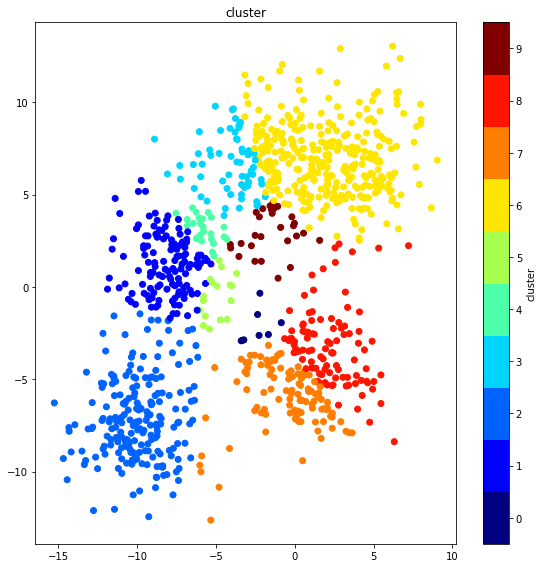

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***